# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=5)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=5)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(lats)

[ 55.84750938  13.71823886 -49.13056039 -36.28393221   0.18704328]


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Retrieving data from API call
# Creating empty lists for future information we want from API call

temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Constructing the URL

for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    query_url = url + "appid=" + weather_api_key + "&q=" + city

    # Sending the API query
    response = requests.get(query_url).json()

    # appending relevant information form each call to its respective list
    temperature.append((9/5) * (response['main']['temp_max'] - 273) + 32) # Appends and converts from Kelvin to Fahrenheit
    humidity.append(response['main']['humidity'])
    cloudiness.append(response['clouds']['all'])
    wind_speed.append(response['wind']['speed'])


print(wind_speed)

[4.63, 4.63, 0.08, 4.63, 6.08]


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City" : cities,
    "Lat" : lats,
    "Lng" : lngs,
    "Max Temp (f)" : temperature,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed
}

weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Lat,Lng,Max Temp (f),Humidity,Cloudiness,Wind Speed
0,saint anthony,55.847509,-55.834263,48.470,87,90,4.63
1,hilo,13.718239,-152.085881,84.470,51,1,4.63
2,albany,-49.130560,113.384101,66.272,29,96,0.08
3,cooma,-36.283932,148.315102,44.870,100,75,4.63
4,atuona,0.187043,-134.665248,80.042,73,82,6.08


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# Code to remove any cities if their humidity is over 100% 

weather_df = weather_df.loc[weather_df['Humidity'] <= 100]
weather_df

,City,Lat,Lng,Max Temp (f),Humidity,Cloudiness,Wind Speed
0,saint anthony,55.847509,-55.834263,48.470,87,90,4.63
1,hilo,13.718239,-152.085881,84.470,51,1,4.63
2,albany,-49.130560,113.384101,66.272,29,96,0.08
3,cooma,-36.283932,148.315102,44.870,100,75,4.63
4,atuona,0.187043,-134.665248,80.042,73,82,6.08


In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

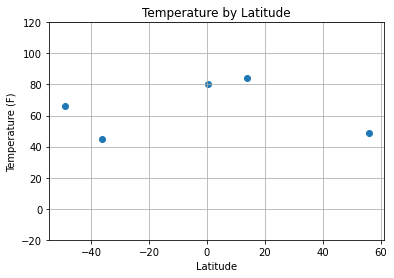

In [8]:
plt.scatter(lats, temperature)
plt.title('Temperature by Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-20, 120)
plt.grid()

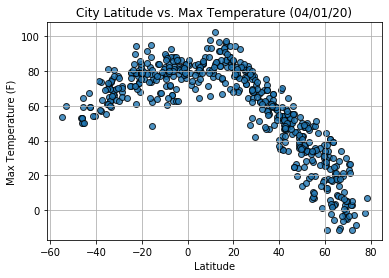

## Latitude vs. Humidity Plot

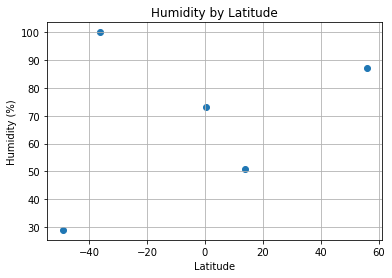

In [9]:
plt.scatter(lats, humidity)
plt.title('Humidity by Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.grid()

## Latitude vs. Cloudiness Plot

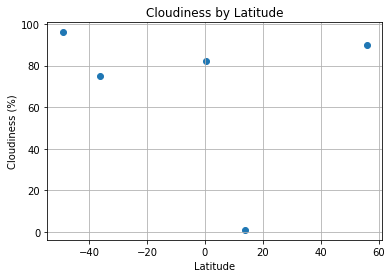

In [10]:
plt.scatter(lats, cloudiness)
plt.title('Cloudiness by Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.grid()

## Latitude vs. Wind Speed Plot

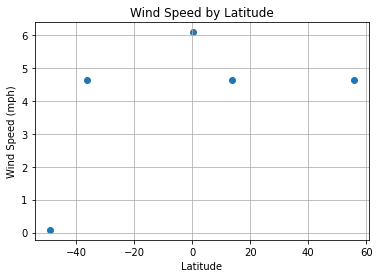

In [11]:
plt.scatter(lats, wind_speed)
plt.title('Wind Speed by Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.grid()

## Linear Regression

In [12]:
# Creating new data frames for northern and southern hemispheres

# North data frame
north_df = weather_df.loc[weather_df['Lat'] > 0]

# Assigning quick variables for later convenience
n_lats = north_df['Lat']
n_temperature = north_df['Max Temp (f)']
n_humidity = north_df['Humidity']
n_cloudiness = north_df['Cloudiness']
n_wind_speed = north_df['Wind Speed']


# South data frame
south_df = weather_df.loc[weather_df['Lat'] < 0]

# Assigning quick variables for later convenience
s_lats = south_df['Lat']
s_temperature = south_df['Max Temp (f)']
s_humidity = south_df['Humidity']
s_cloudiness = south_df['Cloudiness']
s_wind_speed = south_df['Wind Speed']


[]

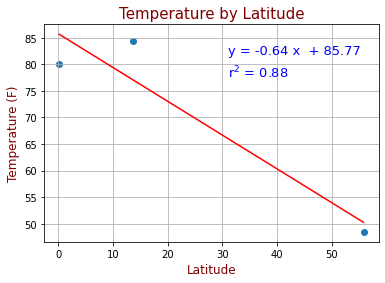

In [46]:
plt.scatter(n_lats, n_temperature)
plt.title('Temperature by Latitude', color='maroon', size=15)
plt.xlabel('Latitude', color='maroon', size=12)
plt.ylabel('Temperature (F)', color='maroon', size=12)

plt.grid()


# Get regression values where regress_model = x_value * slope + intercept

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_temperature)
regress_model_values = n_lats * slope + intercept
r_squared = rvalue * rvalue

# Adding trend line, slope equation, and r squared value
regress_model = f"y = {round(slope, 2)} x  + {round(intercept, 2)}"
r_squared_text = f"r$^2$ = {round(r_squared, 2)}"
plt.plot(n_lats, regress_model_values, "r-")
plt.annotate(regress_model, (31,82), color='blue', size=13)
plt.annotate(r_squared_text, (31,77.5), color='blue', size=13)

plt.plot()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


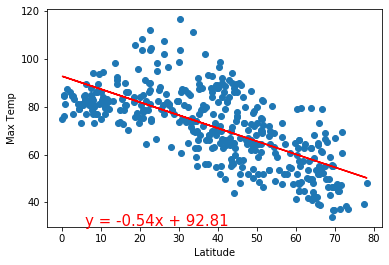

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


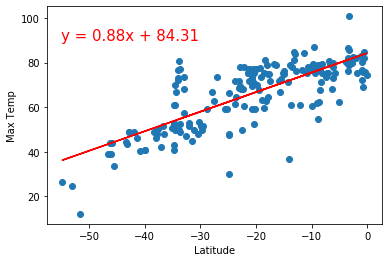

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


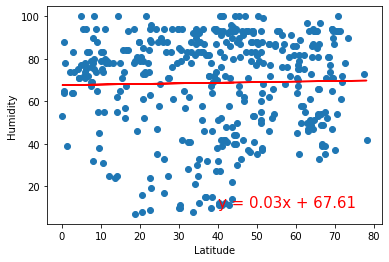

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


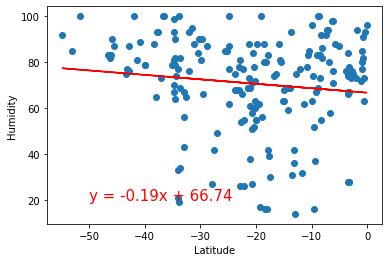

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


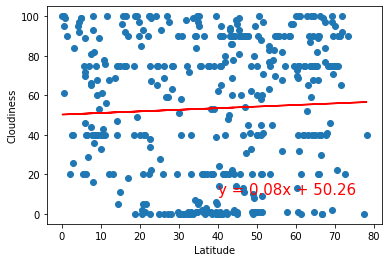

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


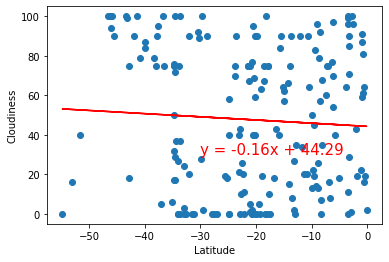

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


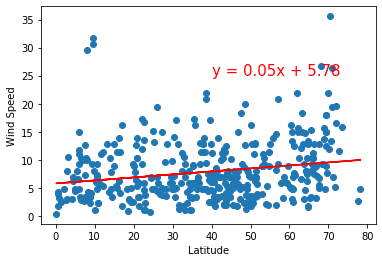

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


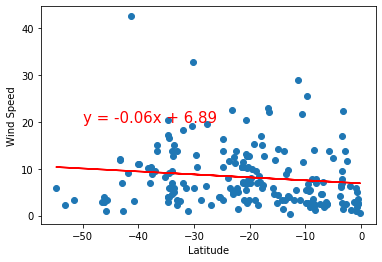